# Исследование рынка стартапов  для выявления перспективных стартапов для перепродажи.

## Введение

**Цели проекта:** Исследовать финансирование стартапов. Выделить критерии по которым можно оценить привлекательность стартапа для его покупки и перепродажи.


## Знакомство с данными, загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

###  Описание структуры данных

**Описание датасета company_and_rounds:**
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

**Описание датасета acquisition:**
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

**Описание датасета education:**
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

**Описание датасета people:**
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

**Описание датасета degrees:**
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

**Описание датасета fund:**
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

**Описание датасета investment:**
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

In [1]:
# Импорт библиотеки
import pandas as pd

# Импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Импорт библиотек для расчёта коэффициента корреляции phi_k
# Оптимизация загрузки библиотеки (это позволит установить необходимую библиотеку в случае её отсутствия)
try:
    import phik
except ModuleNotFoundError as e:
    !pip install phik
    import phik
    print("Error was:", e)

### Знакомство с данными
- Создание датафреймов из предоставленных таблиц
- Проверка и приведение к единому стилю написания названий столбцов
- Вывод основной информации о датафреймах

In [2]:
# Создание датафремов из таблиц
# Запись базовой части в переменную 
base_url = "https://code.s3.yandex.net/datasets/"

# Создание датафремов с использованием переменной
company_and_rounds = pd.read_csv(base_url + 'company_and_rounds.csv')
acquisition = pd.read_csv(base_url + 'acquisition.csv')
degrees = pd.read_csv(base_url + 'degrees.csv')
education = pd.read_csv(base_url + 'education.csv')
fund = pd.read_csv(base_url + 'fund.csv')
investment = pd.read_csv(base_url + 'investment.csv')
people = pd.read_csv(base_url + 'people.csv')

In [3]:
# Знакомство с данными датафрейма company_and_rounds, который заказчик считает основным
company_and_rounds.head(20)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В названиях столбцов присутствуют пробелы. Приведем названия к стилю snake case. Так как присутствуют столбцы с одинаковыми названиями в разном регистре, нужно переименоовать один из них, во избежание путаницы.

In [4]:
# Названия столбцов до изменений
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [5]:
# Переимование столбца 'company ID' в 'id'
company_and_rounds = company_and_rounds.rename(columns={'company  ID': 'id'})

# Приведение столбцов в company_and_rounds к стилю snake case
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ','_')

# Названия столбцов после изменений
company_and_rounds.columns

Index(['id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
       'domain', 'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones', 'funding_round_id',
       'company_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')

**Автоматизация анализа данных** с помощью  функции, которая выводит общую информацию о датафрейме, процент пропусков по столбцам, наличие дубликатов, число уникальных значений в данных.

In [6]:
# Создаем список названий файлов
filenames = ['company_and_rounds.csv', 'acquisition.csv', 'degrees.csv', 'education.csv', 'fund.csv', 'investment.csv', 'people.csv']
# Создаем список датафреймов
dfs = {file: pd.read_csv(base_url + file) for file in filenames}


def lookup_datasets(dfs, filenames=None):
    """
    Выводит информацию о датасетах из списка

    Parameters:
        dfs (list of pd.DataFrame): Список датафреймов для обработки.
        filenames (list of str): Список названий файлов (имена для отображения).
    """
    if filenames is None:
        filenames = [f"df_{i + 1}" for i in range(len(dfs))]

    for df, df_name in zip(dfs, filenames):
        print('-'*10,' '*5, df_name, ' '*5, '-'*10)

        # Пропущенные значения
        missing_data = df.isna().mean()
        missing_data_result = missing_data.apply(lambda x: f'{x:.2%}' if x > 0 else "")
        missing_data_name = "Пропущено" if missing_data.sum() > 0 else ""
        missing_data_result.name = missing_data_name

        # Типы данных
        dtypes_result = df.dtypes
        dtypes_result.name = "Тип данных колонки"
        fewest_nans_row = df.iloc[1:-1].isna().sum(axis=1).idxmin()

        values_type = df.loc[fewest_nans_row].map(type).T
        values_type.name = "Тип значения"

        # Объединяем результаты и пример данных
        result = pd.concat([
            dtypes_result, # типы
            values_type, # типы значений
            missing_data_result, # пропущенные значения
            df.iloc[0, :], # первая строка
            df.loc[fewest_nans_row].T, # полная строка
            df.iloc[-1, :] # последняя строка
        ], axis=1)

        display(result)

        # Проверка на полные дубликаты
        duplicates = df.duplicated().mean()
        if duplicates > 0:
            print(f'Полных дубликатов: {duplicates:.2%}')

        print()

# Проводим автоматический осмотр данных
column_counts = lookup_datasets(dfs.values(), dfs.keys())

----------       company_and_rounds.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,91,217773
company ID,float64,<class 'numpy.float64'>,0.14%,1.0,1006.0,NaN
name,object,<class 'str'>,0.14%,Wetpaint,Youlicit,NaN
category code,object,<class 'str'>,33.93%,web,web,NaN
status,object,<class 'str'>,0.14%,operating,closed,NaN
founded at,object,<class 'str'>,49.51%,2005-10-17,2006-09-01,NaN
closed at,object,<class 'str'>,98.42%,NaN,2010-05-22,NaN
domain,object,<class 'str'>,32.43%,wetpaint-inc.com,youlicit.com,NaN
network username,object,<class 'str'>,56.13%,BachelrWetpaint,youlicit,NaN
country code,object,<class 'str'>,50.13%,USA,USA,NaN
investment rounds,float64,<class 'numpy.float64'>,0.14%,0.0,0.0,NaN



----------       acquisition.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,9406
id,int64,<class 'numpy.int64'>,,1,7,10529
acquiring_company_id,int64,<class 'numpy.int64'>,,11,59,53
acquired_company_id,int64,<class 'numpy.int64'>,,10,72,92846
term_code,object,<class 'str'>,80.54%,NaN,cash,NaN
price_amount,int64,<class 'numpy.int64'>,,20000000,60000000,42600000
acquired_at,object,<class 'str'>,0.31%,2007-05-30,2007-07-01,2013-12-12



----------       degrees.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,109609
id,int64,<class 'numpy.int64'>,,1,2,109610
object_id,object,<class 'str'>,,p:6117,p:6136,p:268528
degree_type,object,<class 'str'>,10.23%,MBA,BA,J.D.
subject,object,<class 'str'>,25.83%,NaN,"English, French",NaN



----------       education.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,109609
id,int64,<class 'numpy.int64'>,,1,2,109610
person_id,int64,<class 'numpy.int64'>,,6117,6136,268528
instituition,object,<class 'str'>,0.05%,NaN,"Washington University, St. Louis",University of San Diego School of Law
graduated_at,object,<class 'str'>,47.04%,NaN,1990-01-01,NaN



----------       fund.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,1,11651
id,int64,<class 'numpy.int64'>,,13131,1,2553
name,object,<class 'str'>,0.02%,NaN,Greylock Partners,fbFund
founded_at,object,<class 'str'>,60.48%,NaN,1965-01-01,NaN
domain,object,<class 'str'>,36.82%,NaN,greylock.com,developers.socialnet.com::fbfund.php
network_username,object,<class 'str'>,81.56%,NaN,greylockvc,fbFund
country_code,object,<class 'str'>,39.47%,NaN,USA,NaN
investment_rounds,int64,<class 'numpy.int64'>,,0,307,23
invested_companies,int64,<class 'numpy.int64'>,,0,196,21
milestones,int64,<class 'numpy.int64'>,,0,0,2



----------       investment.csv       ----------


,Тип данных колонки,Тип значения,,0,1,61402
id,int64,<class 'int'>,,1,2,61403
funding_round_id,int64,<class 'int'>,,1,1,57948
company_id,int64,<class 'int'>,,4,4,211890
fund_id,int64,<class 'int'>,,1,2,2101



----------       people.csv       ----------


,Тип данных колонки,Тип значения,Пропущено,0,6,226708
id,int64,<class 'numpy.int64'>,,10,100006,178190
first_name,object,<class 'str'>,0.00%,Mark,Courtney,Alex
last_name,object,<class 'str'>,0.00%,Zuckerberg,Homer,Smith
company_id,float64,<class 'numpy.float64'>,84.73%,5.0,81558.0,NaN
network_username,object,<class 'str'>,82.86%,NaN,jobsbostontech,esocialnetlike


В датафрейме `company_and_rounds` содержится информация о компаниях и раундах финансирования.
- всего 217774 строк, 22 столбца
- 12 столбцов с типом данных float64
- 10 столбцов с типом данных object. В столбце founded_at содержится дата финансирования, тип данных некорректен 
- пропуски есть во всех столбцах
 
Названия столбцов соответствуют содержанию. Есть столбцы с идентичным названием, но с разным содержанием `company_ID` и `company_id`. Чтобы избежать ошибок при одинаковом имени столбцов, столбец `company_ID` переименован в `id`.

Столбцы `is_first_round` и `is_last_round` показывают наличие у клиента того или иного признака и содержат значения `1` или `0`.

В датафрейме `acquisition` содержится информация о покупках одними компаниями других компаний.

- всего 9407 строк, 6 столбцов
- 4 столбца с типом данных int64
- 2 столбца с типом данных object. В столбце acquired_at содержится дата финансирования, тип данных некорректен.
- пропуски есть в двух столбцах
- названия столбцов соответствуют содержанию.

В датафрейме `degrees` содержится информация о типе образования сотрудника.

- всего 109610 строк, 4 столбца
- 1 столбец с типом данных int64
- 3 столбца с типом данных object
- пропуски есть в двух столбцах
- названия столбцов соответствуют содержанию.

В датафрейме `education` содержится информация о покупках одними компаниями других компаний.

- всего 109610 строк, 4 столбца
- 1 столбец с типом данных int64
- 3 столбца с типом данных object.  В столбце graduated_at содержится дата получения образования, тип данных некорректен.
- пропуски есть в двух столбцах
- названия столбцов соответствуют содержанию.

В датафрейме `fund` содержится информация о фондах.

- всего 11652 строк, 9 столбцов
- 4 столбца с типом данных int64
- 5 столбцов с типом данных object
- пропуски есть в пяти столбцах
- названия столбцов соответствуют содержанию.

В датафрейме `investment` содержится информация о раундах инвестирования.

- всего 6140 строк, 4 столбца
- 4 столбца с типом данных int64
- пропусков нет
- названия столбцов соответствуют содержанию.

В датафрейме `people` содержится информация о сотрудниках.

- всего 226709 строк, 5 столбцов
- 1 столбец с типом данных float64
- 1 столбец с типом данных int64
- 3 столбца с типом данных object
- пропуски есть в четырех столбцах
- названия столбцов соответствуют содержанию.

### Смена типов данных и анализ пропусков

В датафреймах `company_and_rounds`, `acquisition`, `education`, `fund в столбцах` с типом `object` содержится дата и время. Для столбцов, содержащих дату и время нужжно изменить тип данных на `datetime64`

In [7]:
# Изменение типа данных в датафрейме company_and_rounds
company_and_rounds[['founded_at', 'closed_at', 'funded_at']] = company_and_rounds[['founded_at', 'closed_at', 'funded_at']].astype('datetime64[ns]')
# Информация о датафрейме с новым типом данных
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [8]:
# Выделение года из столбцов с датами для удобства анализа по годам 
company_and_rounds[['founded_year', 'closed_year', 'funded_year']] = company_and_rounds[['founded_at', 'closed_at', 'funded_at']].apply(lambda x: x.dt.year)

In [9]:
# Несколько строк датафрейма с новыми столбцами
company_and_rounds.head()

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0,NaN,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005.0,NaN,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005.0,NaN,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Замена типа данных в датафрейме acquisition
acquisition['acquired_at'] = acquisition['acquired_at'].astype('datetime64[ns]')
# Выводим информацию о датафрейме с новым типом данных
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [11]:
# Замена типа данных в датафрейме education
education['graduated_at'] = education['graduated_at'].astype('datetime64[ns]')
# Информация о датафрейме с новым типом данных
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [12]:
# Замена типа данных в датафрейме fund
fund['founded_at'] = fund['founded_at'].astype('datetime64[ns]')
# Информация о датафрейме с новым типом данных
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


### Оценка полноты данных

In [13]:
# Удаление явных дубликатов в company_and_rounds
company_and_rounds.drop_duplicates()

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0,NaN,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005.0,NaN,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005.0,NaN,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,NaN,NaN,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,NaN,NaN,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,NaN,NaN,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,NaN,NaN,2013.0


In [14]:
# Удаление явных дубликатов в acquisition
acquisition.drop_duplicates()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [15]:
# Удаление явных дубликатов в people
people.drop_duplicates()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [16]:
# Удаление явных дубликатов в degrees
degrees.drop_duplicates()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


In [17]:
# Удаление явных дубликатов в education
education.drop_duplicates()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaT
109606,109607,268527,South China University of Technology,NaT
109607,109608,268527,Clarkson University,NaT
109608,109609,268528,Colorado State University,NaT


In [18]:
# Удаление явных дубликатов в fund
fund.drop_duplicates()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...
11647,9997,Axel Johnson,1920-01-01,axeljohnson.com,NaN,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01,network.com::haystack_fund,haystack_fund,NaN,5,5,0


In [19]:
# Удаление явных дубликатов в investment
investment.drop_duplicates()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
...,...,...,...,...
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098


Количество строк во всех датафреймах не изменилось. Явных дубликатов нет

На этапе знакомства с данными были выявлены пропуски во многих столбцах. Для дальнейшей работы нужно определить их долю в датафреймах, чтобы понять, можно ли их удалить.

In [20]:
# Расчет доли пропусков в столбце company_and_rounds
pd.DataFrame(round(company_and_rounds.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
closed_year,98.420000
closed_at,98.420000
funded_year,75.810000
funded_at,75.810000
is_last_round,75.700000
funding_round_type,75.700000
company_id,75.700000
funding_round_id,75.700000
participants,75.700000
is_first_round,75.700000


In [21]:
# Расчет доли пропусков в датафрейме acquisition
pd.DataFrame(round(acquisition.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
term_code,80.540000
acquired_at,0.310000
id,0.000000
acquiring_company_id,0.000000
acquired_company_id,0.000000
price_amount,0.000000


In [22]:
# Расчет доли пропусков в датафрейме education
pd.DataFrame(round(education.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
graduated_at,47.040000
instituition,0.050000
id,0.000000
person_id,0.000000


In [23]:
# Расчет доли пропусков в датафрейме people
pd.DataFrame(round(people.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
company_id,84.730000
network_username,82.860000
id,0.000000
first_name,0.000000
last_name,0.000000


In [24]:
# Расчет доли пропусков в датафрейме degrees
pd.DataFrame(round(degrees.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
subject,25.830000
degree_type,10.230000
id,0.000000
object_id,0.000000


In [25]:
# Расчет доли пропусков в датафрейме fund
pd.DataFrame(round(fund.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
network_username,81.560000
founded_at,60.480000
country_code,39.470000
domain,36.820000
name,0.020000
id,0.000000
investment_rounds,0.000000
invested_companies,0.000000
milestones,0.000000


In [26]:
# Расчет доли пропусков в датафрейме investment
pd.DataFrame(round(investment.isna().mean()*100, 2)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
id,0.000000
funding_round_id,0.000000
company_id,0.000000
fund_id,0.000000


В датафрейме `company_and_rounds` пропуски связаны, скорее всего, с присоединением другой таблицы (это видно по названиям столбцов). Также пропуски в датах закрытия компании, вехах финансирования логичны, если компания еще не закрыта или прошла веху финансирования.

Пропуски в `acquisition` могут быть связаны с отсутствием этих данных у заказчика. 

Пропуски в `education`, `degrees` и `people` могут быть связаны с с тем что компании не полностью указывают информацию о сотрудниках.

Пропуски в `fund` также, скорее всего, связаны с неполной информацией у заказчика.

Пропусков в `investment` нет.

Помимо этого, некоторые поля могут быть опциональными и поэтому не все компании их заполнили.

Во всех датафреймах, кроме `investment`, содержится значительное количество пропусков, от 25% до 98%. Удаление такого количества информации приведет к искажению результатов при анализе. При этом информацию о раундах финансирования, раундах инвестирования и денежных суммах можно считать достаточной для анализа. Оставим пропуски без изменений.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Исследование проводится без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

In [27]:
# Сводная таблица по годам с типичным размером средств для одного раунда и общим количеством раундов в год
funding_years = company_and_rounds.groupby('funded_year').agg({'raised_amount':'median', 'funding_rounds':'sum'})
# Года в которых количество раундов больше 50 
funding_years_50 = funding_years.loc[funding_years['funding_rounds'] >= 50]
display(funding_years_50)

,raised_amount,funding_rounds
funded_year,,
1998.0,100000.0,72.0
1999.0,2000000.0,268.0
2000.0,4200000.0,403.0
2001.0,3000000.0,302.0
2002.0,4200000.0,385.0
2003.0,3000000.0,569.0
2004.0,5000000.0,1057.0
2005.0,5500000.0,4157.0
2006.0,5000000.0,6295.0


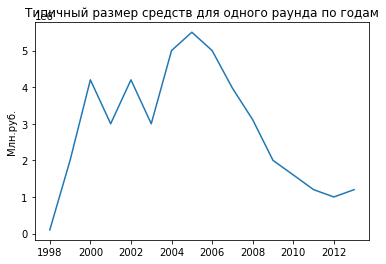

<Figure size 864x432 with 0 Axes>

In [28]:
# Построим график для визуализации финансирования по годам

funding_years_50['raised_amount'].plot.line()

plt.title('Типичный размер средств для одного раунда по годам')
plt.xlabel('')
plt.ylabel('Млн.руб.')
plt.figure(figsize=(12, 6))
plt.show()

- В 2005 году **типичный размер** собранных в рамках одного раунда средств был максимален и составил 5,5 млн.руб.
- До 2005 года наблюдался неравномерный рост финансирования в одном раунде, а после 2005 года равномерный спад до 1,0 млн.руб. в 2012 году.
- В 2013 году сбор средств увеличился до 1,2 млн.руб


- **Количество раундов** непрерывно росло до максимального значения 24549 в 2012 году
- В 2013 году количество раундов снизилось до 23978


### Люди и их образование

Зависимость полноты сведений о сотрудниках (об их образовании) от размера компаний.

In [29]:
# Объединение датафреймов people и education для анализа компаний
people_education = people.merge(education, left_on='id', right_on='person_id', how='left')
# Несколько строк объединенного датафрейма
display(people_education.head(20))

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT


In [30]:
# Доля сотрудников без инфрмации об образовании по всем данным
round(1-people_education['instituition'].nunique() / len(people_education['instituition']),2)

0.92

In [31]:
# Доля сотрудников без инфрмации об образовании по компаниям
people_education['education_share'] = round((1 - people_education.groupby('company_id')['instituition'].transform('nunique')
                                          / people_education.groupby('company_id')['instituition'].transform('size')),2)

In [32]:
# Количество сотрудников по компаниям
people_education['people_count'] = people_education.groupby('company_id')['person_id'].nunique()

**Назначение категории компаниям** 

Закон  устанавливает рамочные критерии для отнесения предприятий к малым и средним. Первый критерий - численность работников, второй - выручка предприятия. 

К микропредприятиям относятся организации, в которых число сотрудников не превышает 15, к малым - с штатом от 16 до 100 человек, к средним - с числом сотрудников до 250 человек.


На основе наших данных разделим компании на категории по количеству сотрудников.

In [33]:
# Группы компаний по количеству сотрудников
people_education['category'] = pd.cut(people_education['people_count'], bins=[0, 1, 15, 100, 250, 1000, 100000], labels=["Один сотрудник" ,"Микро", "Малая", "Средняя", "Крупная", "Очень крупная"])

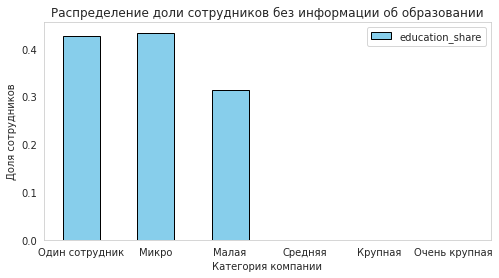

In [97]:
# Столбчатая диаграмма по категориям
people_education.groupby('category')['education_share'].mean().plot(kind='bar',
               title=f'Распределение доли сотрудников без информации об образовании',
               legend=True,
               ylabel='Доля сотрудников',
               xlabel='Категория компании',
               color='skyblue',
               edgecolor='black',
               rot=0,
               figsize=(8, 4))
plt.grid()

# Выводим график
plt.show()

На диаграмме видна зависимость пропусков информации об образовании и размеров компании.
Возможно, в малых компаниях HR-процессы менее структурированы и могут быть пропуски в данных о сотрудниках.
В средних и крупных компаниях пропусков нет. Возможно, выше вероятность полной информации об образовании из-за налаженых HR-процессов.

Попробуем дополнить датафрейм `people_education` информацией из таблицы `degrees`.
Объединить таблицы можно по столбцу идентификатору сотрудника - 'person_id' и 'object_id'. Столбец 'person_id' содержит буквенный индекс перед номером id и имеет тип данных object. Перед объединением нужно убрать буквенный индекс и изменить тип данных.

In [35]:
# Удаление букв из id сотрудника в столбце 'object_id'
degrees['object_id'] = degrees['object_id'].str.replace('p:', '')

In [36]:
# Изменение типа данных
degrees['object_id'] = degrees['object_id'].astype('int64')

In [37]:
# Проверка корректности исправлений
degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [38]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Название и тип данных скорректированы. Можно объединять таблицы

In [39]:
# Присоединнение таблицы degrees
people_education_degrees = people_education.merge(degrees, left_on='person_id', right_on='object_id', how='left')
# Несколько строк объединенного датафрейма
display(people_education_degrees.head(20))

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,education_share,people_count,category,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,0.62,NaN,NaN,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,0.64,1.0,Один сотрудник,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1.00,1.0,Один сотрудник,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1.00,2.0,Микро,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,12.0,Микро,NaN,NaN,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,45.0,Малая,NaN,NaN,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,0.00,NaN,NaN,83604.0,100006.0,MBA,Strategy & Marketing
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,NaN,1.0,Один сотрудник,NaN,NaN,NaN,NaN


In [40]:
# Названия типа образования сотрудников
people_education_degrees['degree_type'].unique()

array([nan, 'MBA', 'MS', ..., 'HEAO propaedeuse', 'Film and Television',
       '1st BSc (Hons)'], dtype=object)

In [41]:
# Названия специальностей сотрудников
people_education_degrees['subject'].unique()

array(['Computer Science', nan, 'Strategy & Marketing', ...,
       'Philosophy and Literature', 'Sustainable Business',
       'Building Startups on a Budget, Tech'], dtype=object)

Похоже, что информация из таблицы `degrees` не поможет заполнить пропуски в информации об образовании, но дополнит существующую информацию. 

Сейчас данные дополнены информацией о типе образования и специальностях сотрудников. При необходимости, можно использовать эту информацию для анализа. 

### Проверка целесообразности объединения таблиц по столбцу `network_username`

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

Возможно, столбец `network_username` также подходит для объединения таблиц, так как встречается в нескольких датасетах.

In [42]:
# Уникальные значения столбца 'network_username'
company_and_rounds['network_username'].unique()

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

In [43]:
people['network_username'].unique()

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

In [44]:
fund['network_username'].unique()

array([nan, 'greylockvc', 'imi_vc', ..., 'CalSTRS', 'haystack_fund',
       'fbFund'], dtype=object)

Столбец `network_username` встречается в таблицах `people`, `company_and_rounds` и `fund` и содержит информацию о никах сотрудника, компании и фонда в соцсетях. Потенциально сотрудник может указать в нике компанию. Но на этапе знакомства с данными видно, что ник чаще всего содержит имя сотрудника, название компании или фонда, так что столбец `network_username` не подходит для объединения данных.


### Проверка проблемного датасета и причины возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

Судя по названию столбцов и информации от заказчика, таблица `company_and_rounds` составлена из двух таблиц. Скорее всего таблица с информацией о компаниях была дополнена таблицей с этапами финансирования. Есть два столбца с одинаковым назавнием `company_ID` и `company_id` и два столбца с суммой финансирования `funding_total` и `raised_amount`. В столбце `raised_amount` суммы знаительно меньше, похоже, они отражают сумму одного этапа. В столбце `funding_total` скорее всего содержится вся сумма финансирования. Столбцы, расположенные после `funding_round_id` имеют много пропусков.

Разделим датафрейм на два. Один с с информацией о компаниях, второй с этапами финансирования.

In [45]:
company_and_rounds.head()

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0,NaN,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005.0,NaN,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005.0,NaN,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Создание датафрейма с информацией о компаниях
company = company_and_rounds.drop(columns=['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount',
                                                           'pre_money_valuation', 'participants', 'is_first_round',
                                                           'is_last_round', 'founded_year', 'closed_year', 'funded_year'])

In [47]:
# Удаление дубликатов в таблице company
company = company.drop_duplicates()

In [48]:
# Пропуски в столбце id (если они есть, то пропуски помешают изменить тип столбца)
company[company['id'].isna()]

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
217472,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуск содержится в строке 217472, кроме того в этой строке нет данных ни по одному столбцу. Можно удалить эту строку

In [49]:
# Удаление строки с пропуском в id
company = company.dropna(subset=['id'])

In [50]:
# Сортировка по id
company = company.sort_values(by='id')

In [51]:
# Изменение типа столбеца id на целочисленный
company['id'] = company['id'].astype('int64')

In [52]:
# Типы данных
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 152354
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 196553 non-null  int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), 

In [53]:
# Сбросим старый индекс
company.reset_index(drop=True)

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,286210,LG Electronics North America,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,1.0
196549,286211,M1 Capital Advisors LLC,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0
196550,286212,M1 Partners,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0
196551,286213,Computer Solutions,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0


In [54]:
# Несколько строк итогового датасета
company.head()

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
63280,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
153920,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0


**Без пропусков** в датафрейме `company` содержится информация о
- name - названии компании
- status — статус компании
- investment_rounds — число инвестиционных раундов
- funding_rounds — число раундов финансирования
- funding_total — сумма финансирования
- milestones — вехи финансирования

эти данные полны и позволят анализировать финансирование компаний

**Пропуски** остались в столбцах 
- category_code — категория области деятельности компании
- founded_at — дата инвестирования
- closed_at — дата закрытия компании
- domain  — официальный сайт компании
- network_username — ник компании в сети
- country_code — код страны компании

эти данные не так важны для анализа финансирования компаний, поэтому их можно оставить без изменений

Аналогично для нового датафрейма `rounds`

In [55]:
# Создание датафрейма с информацией о раундах
rounds = company_and_rounds[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount',
                                                           'pre_money_valuation', 'participants', 'is_first_round',
                                                           'is_last_round', 'founded_year', 'closed_year', 'funded_year']]

In [56]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   funding_round_id     52928 non-null   float64       
 1   company_id           52928 non-null   float64       
 2   funded_at            52680 non-null   datetime64[ns]
 3   funding_round_type   52928 non-null   object        
 4   raised_amount        52928 non-null   float64       
 5   pre_money_valuation  52928 non-null   float64       
 6   participants         52928 non-null   float64       
 7   is_first_round       52928 non-null   float64       
 8   is_last_round        52928 non-null   float64       
 9   founded_year         109956 non-null  float64       
 10  closed_year          3449 non-null    float64       
 11  funded_year          52680 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 19.9+ MB


In [57]:
# Удаление дубликатов в таблице rounds
rounds = rounds.drop_duplicates()

In [58]:
# Выведем пропуски в столбце id, если они есть, так как пропуски помешают изменить тип столбца
rounds[rounds['funding_round_id'].isna()]

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,NaN,NaN
11,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,NaN
18,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,2010.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
198515,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,2007.0,NaN
203885,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2009.0,NaN
211662,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2013.0,NaN
216295,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,2009.0,NaN


Столбец `funding_round_id` содержит 201 строку с пропусками, а также пропуски почти во всех ячейках. Так как без `funding_round_id` эта информация неприменима для анализа , можно удалить эти строки

In [59]:
# Удаление пропусков в столбце funding_round_id (если они есть, то пропуски помешают изменить тип столбца)
rounds = rounds.dropna(subset=['funding_round_id'])

In [60]:
# Приведем столбцы с id к целочисленному типу
rounds['funding_round_id'] = rounds['funding_round_id'].astype('int64')
rounds['company_id'] = rounds['company_id'].astype('int64')

In [61]:
# Сортировка по id
rounds = rounds.sort_values(by='funding_round_id')

In [62]:
# Сбросим старый индекс
rounds.reset_index(drop=True)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
0,1,4,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2004.0,NaN,2006.0
1,2,5,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0,NaN,2004.0
2,3,5,2005-05-01,series-a,12700000.0,115000000.0,3.0,0.0,0.0,2004.0,NaN,2005.0
3,4,5,2006-04-01,series-b,27500000.0,525000000.0,4.0,0.0,0.0,2004.0,NaN,2006.0
4,5,7299,2006-05-01,series-b,10500000.0,0.0,2.0,0.0,0.0,2003.0,NaN,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,211890,2013-12-12,series-a,3000000.0,0.0,1.0,1.0,1.0,2007.0,NaN,2013.0
52924,57949,267427,2010-02-06,venture,570000.0,0.0,0.0,0.0,1.0,2003.0,NaN,2010.0
52925,57950,261728,2010-02-06,venture,2184100.0,0.0,0.0,0.0,1.0,2004.0,NaN,2010.0
52926,57951,285864,2013-12-12,series-a,790783.0,0.0,0.0,1.0,1.0,2011.0,NaN,2013.0


In [63]:
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded_year,closed_year,funded_year
165414,1,4,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2004.0,NaN,2006.0
217286,2,5,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0,NaN,2004.0
217287,3,5,2005-05-01,series-a,12700000.0,115000000.0,3.0,0.0,0.0,2004.0,NaN,2005.0
217288,4,5,2006-04-01,series-b,27500000.0,525000000.0,4.0,0.0,0.0,2004.0,NaN,2006.0
202858,5,7299,2006-05-01,series-b,10500000.0,0.0,2.0,0.0,0.0,2003.0,NaN,2006.0


In [64]:
# Проверка типа данных
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 165414 to 152354
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  int64         
 1   company_id           52928 non-null  int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   founded_year         43196 non-null  float64       
 10  closed_year          2943 non-null   float64       
 11  funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 5.2+ MB


**Без пропусков** в датафрейме `rounds` содержится информация о     
- company_id  — идентификатор компании.      
- funded_at — дата финансирования.  
- funding_round_type  — тип финансирования.      
- raised_amount  — сумма финансирования.        
- pre_money_valuation — предварительная денежная оценка.
- participants  — число участников.           
- is_first_round — является ли раунд первым.          
- is_last_round — является раунд последним.       

эти данные полны и позволят анализировать финансирование компаний

**Пропуски** остались в столбцах 
- founded_year   — дата инвестирования.  
- closed_year   — дата закрытия компании.       
- funded_year   — дата финансирования. 

эти данные не так важны для анализа финансирования компаний, поэтому их можно оставить без изменений


## Исследование данных объединённых таблиц


### Объединение данных

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv`, отберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работаем только с этими данными.

In [65]:
# Датафрейм со значениями раундов финансирования и инвестирования больше нуля и статусом компании acquired
company_filtered = company[(company['funding_rounds']>0) | (company['investment_rounds']>0) | (company['status']=='acquired')]

In [66]:
company_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 152354
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 40747 non-null  int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory

In [67]:
company_filtered.shape

(40747, 13)


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

In [68]:
# Разброс данных общего финансирования по столбцу funding_total
company_filtered['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

По разбросу значений видно, что распределение `funding_total` сильно асимметрично:

- min = 0, max = 5.7 млрд.
- среднее = 10,1 млн.
- медиана = 600 тыс.
- 75% квантиль = 5.65 млн.

Среднее значительно больше медианы, что говорит о наличии выбросов. Гистограмма или boxplot на линейной шкале будет смещена из-за очень больших выбросов. Также сами значения и их разброс очень большие, что сделает нечитаемой визуализацию.

В данном случае лучше использовать логарифмическую шкалу.

Так как заказчика интересует стартапы получившие финансирование, отфильтруем значения `funding_total` равные 0.

In [69]:
# Отфильтруем значения funding_total равные 0
company_filtered = company_filtered[company_filtered['funding_total'] > 0]

In [70]:
# Разброс данных по столбцу funding_total со значениями больше 0
company_filtered['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

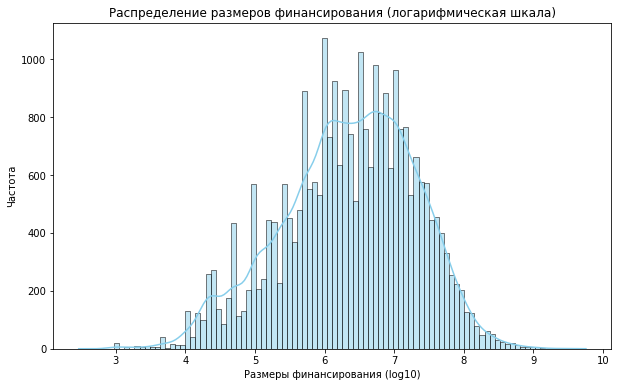

In [71]:
# Гистограмма, чтобы посмотреть как распределяются размеры финансирования
funding_log = np.log10(company_filtered['funding_total'] + 1)


plt.figure(figsize=(10, 6))

sns.histplot(funding_log, bins=100, kde=True, color='skyblue')

plt.title('Распределение размеров финансирования (логарифмическая шкала)')
plt.xlabel('Размеры финансирования (log10)')
plt.ylabel('Частота')

plt.show()

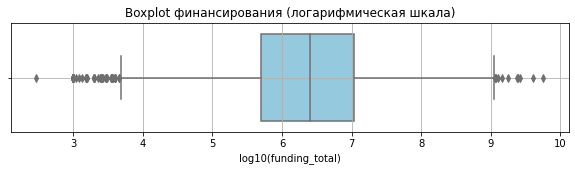

In [72]:
# Построим boxplot для оценки данных
plt.figure(figsize=(10, 2))

sns.boxplot(x=np.log10(company_filtered['funding_total'] + 1), color='skyblue')

plt.title('Boxplot финансирования (логарифмическая шкала)')
plt.xlabel('log10(funding_total)')
plt.grid()
plt.show()

Теперь значения распределились так:

- min = 291 , max = 5.7 млрд.
- среднее = 14,8 млн.
- медиана = 2,56 млн.
- 75% квантиль = 11 млн.

Среднее и медиана сильно отличаются. За типичное финансирование компании лучше взять медиану значений 2,56 млн, чтобы избежать влияния выбросов.

Судя по боксплоту нетипичным, выбивающимся финансированием можно считать значения `funding_total` до 3,7 млн. и свыше 9 млн.


### Анализ компаний с ненулевым объемом финансирования и купленных за ноль или за один доллар.

In [73]:
# Объединим датафреймы с информацией о покупке компаний и с информацией о финансировании, где общая сумма финансирования больше 0

company_amount = acquisition.merge(company_filtered, left_on='acquired_company_id', right_on='id', how='left')

In [74]:
# Стартапы проданные за 0 или за 1 доллар
company_amount_zero = company_amount[(company_amount['price_amount'] == 0) | (company_amount['price_amount'] <=1)]


In [75]:
# Информация по получившемуся срезу
company_amount_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6934 entries, 6 to 9403
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_x                  6934 non-null   int64         
 1   acquiring_company_id  6934 non-null   int64         
 2   acquired_company_id   6934 non-null   int64         
 3   term_code             642 non-null    object        
 4   price_amount          6934 non-null   int64         
 5   acquired_at           6908 non-null   datetime64[ns]
 6   id_y                  1618 non-null   float64       
 7   name                  1618 non-null   object        
 8   category_code         1553 non-null   object        
 9   status                1618 non-null   object        
 10  founded_at            1285 non-null   datetime64[ns]
 11  closed_at             13 non-null     datetime64[ns]
 12  domain                1546 non-null   object        
 13  network_username  

Всего таких стартапов, купленных за 0 или до 1 доллара 6934.

In [76]:
# Информация по этим данным
company_amount_zero['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

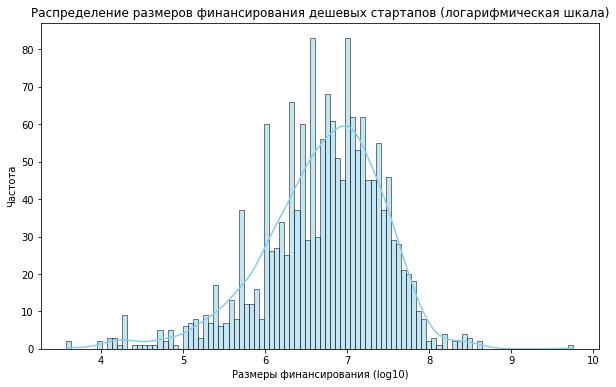

In [77]:
# Построим гистограмму, чтобы посмотреть как распределяются размеры финансирования для дешевых стартапов
funding_log = np.log10(company_amount_zero['funding_total'] + 1)


plt.figure(figsize=(10, 6))

sns.histplot(funding_log, bins=100, kde=True, color='skyblue')

plt.title('Распределение размеров финансирования дешевых стартапов (логарифмическая шкала)')
plt.xlabel('Размеры финансирования (log10)')
plt.ylabel('Частота')

plt.show()

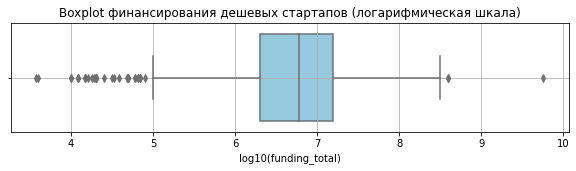

In [78]:
# Построим boxplot для оценки данных
plt.figure(figsize=(10, 2))

sns.boxplot(x=np.log10(company_amount_zero['funding_total'] + 1), color='skyblue')

plt.title('Boxplot финансирования дешевых стартапов (логарифмическая шкала)')
plt.xlabel('log10(funding_total)')
plt.grid()
plt.show()

Значения финансирования дешевых стартапов распределились так:

- min = 3750 , max = 5,7 млрд.
- среднее = 18,15 млн.
- медиана = 6 млн.
- 75% квантиль = 15,5 млн.

Среднее и медиана сильно отличаются. За типичное финансирование компании лучше взять медиану значений, чтобы избежать влияния выбросов.

Нетипичным, выбивающимся финансированием можно считать значения `funding_total` до 5 млн. и свыше 8,5 млн.

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total

In [79]:
# Посчитаем первый и третий квартили (25% и 75%)
Q1 = company_amount_zero['funding_total'].quantile(0.25)
Q3 = company_amount_zero['funding_total'].quantile(0.75) 
# Посчитаем межквартильный размах
IQR = Q3 - Q1 
# Посчитаем нижнюю и верхнюю границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

display(f"Нижняя граница: {lower_bound}")
display(f"Верхняя граница: {upper_bound}")

'Нижняя граница: -18250000.0'

'Верхняя граница: 35750000.0'

Нижняя граница: -18250000.0
Верхняя граница: 35750000.0

Нижняя граница получилась отрицательной. Скорее всего это вызванно ассиметричностью данных, большим количеством маленьких значений и наличием выбросов. Так как финансирование не может быть отрицательным, то за нижнюю границу можно принять ноль.

In [80]:
# Посчитаем каким процентилям соответствуют граицы выбросов
lower_percentile = (company_amount_zero['funding_total'] < lower_bound).mean()*100
upper_percentile = (company_amount_zero['funding_total'] > upper_bound).mean()*100

display(f"Нижняя граница выбросов - {lower_percentile:.2f}%")
display(f"Верхняя граница выбросов - {100 - upper_percentile:.2f}%")

'Нижняя граница выбросов - 0.00%'

'Верхняя граница выбросов - 97.88%'

Границы выбросов соответствуют 0% и 76,67%


### Цены стартапов по категориям

In [81]:
# Для разбиения на категории сначала выведем размах данных по ценам стартапов
acquisition['price_amount'].describe()

count    9.407000e+03
mean     3.932965e+08
std      2.682198e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.343200e+04
max      2.600000e+12
Name: price_amount, dtype: float64

Судя по разбросу значений, в данных о ценах на стартапы присутствует много нулевых значений. Поскольку нам надо проанализировать стартапы с наибольшими ценами, отфильтруем нулевые значения

In [82]:
# Создадим датафрейм без нулевых значений
acquisition_notnull = acquisition[(acquisition['price_amount']>0) & (acquisition['price_amount']<2.600000e+12)]

In [83]:
# Выведем размах данных по ценам стартапов без нулевых значений
acquisition_notnull['price_amount'].describe()

count    2.475000e+03
mean     4.443394e+08
std      1.777543e+09
min      1.000000e+00
25%      1.260000e+07
50%      5.600000e+07
75%      2.627500e+08
max      3.900000e+10
Name: price_amount, dtype: float64

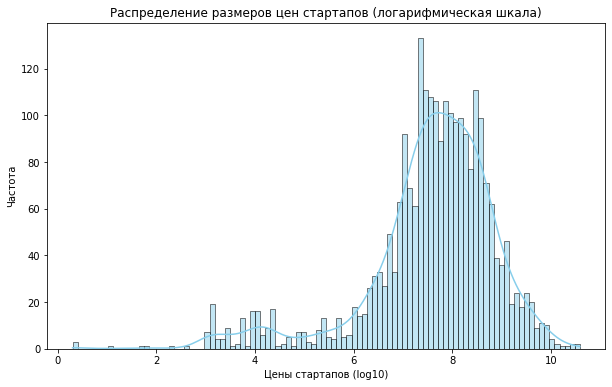

In [84]:
# Построим гистограмму, чтобы посмотреть как распределяются цены стартапов
funding_log = np.log10(acquisition_notnull['price_amount'] + 1)


plt.figure(figsize=(10, 6))

sns.histplot(funding_log, bins=100, kde=True, color='skyblue')

plt.title('Распределение размеров цен стартапов (логарифмическая шкала)')
plt.xlabel('Цены стартапов (log10)')
plt.ylabel('Частота')

plt.show()

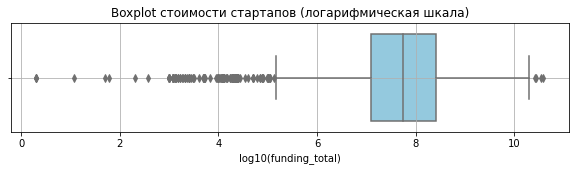

In [85]:
# Построим boxplot для оценки данных
plt.figure(figsize=(10, 2))

sns.boxplot(x=np.log10(acquisition_notnull['price_amount'] + 1), color='skyblue')

plt.title('Boxplot стоимости стартапов (логарифмическая шкала)')
plt.xlabel('log10(funding_total)')
plt.grid()
plt.show()

Поскольку у нас нет явных критериев от заказчика для разбиения по ценам стартапов, то примем такую категоризацию:
- Малые < 1 млн,
- Средние 1 млн - 10 млн,
- Крупные 10 млн - 100 млн,
- Очень крупные 100M - 10 млрд,
- Гиганты > 10 млрд"

In [86]:
# Разделим цены стартапов по категориям:

bins = [-float('inf'), 1_000_000, 10_000_000, 100_000_000, 10_000_000_000, float('inf')]

labels = ["Малые", "Средние", "Крупные", "Очень крупные", "Гиганты"]

acquisition_notnull = acquisition_notnull.copy()

acquisition_notnull['category_amount'] = pd.cut(acquisition_notnull['price_amount'], bins=bins, labels=labels)

In [87]:
# Выведем несколько строк датафрейма с новым столбцом категорий
acquisition_notnull.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,category_amount
0,1,11,10,NaN,20000000,2007-05-30,Крупные
1,7,59,72,cash,60000000,2007-07-01,Крупные
2,8,24,132,cash,280000000,2007-05-01,Очень крупные
3,9,59,155,cash,100000000,2007-06-01,Крупные
4,10,212,215,cash,25000000,2007-07-01,Крупные


In [88]:
# Посчитаем среднюю цену по категориям
category_amount_mean = acquisition_notnull.groupby('category_amount')['price_amount'].mean().sort_values(ascending=False)
category_amount_mean

category_amount
Гиганты          2.033636e+10
Очень крупные    8.516465e+08
Крупные          4.227518e+07
Средние          5.572358e+06
Малые            1.780031e+05
Name: price_amount, dtype: float64

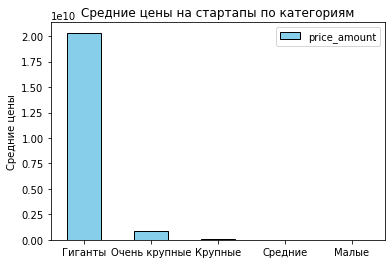

<Figure size 1152x1152 with 0 Axes>

In [89]:
# Посмотрим для наглядности цены на столбчатой диаграмме
category_amount_mean.plot.bar(legend=True,
                title='Средние цены на стартапы по категориям',  
                ylabel='Средние цены',  
                xlabel='',
                color='skyblue',
                edgecolor='black',                                                                   
                rot=0)
sns.set_style("whitegrid")
plt.figure(figsize=(16, 16))
plt.show()

Наибольшие средние цены за стартапы в категории Гиганты.

In [90]:
# Разделим цены стартапов c нулевыми ценами по категориям:

bins = [-float('inf'), 1_000_000, 10_000_000, 100_000_000, 10_000_000_000, float('inf')]

labels = ["Малые", "Средние", "Крупные", "Очень крупные", "Гиганты"]

#acquisition = acquisition.copy()

acquisition['category_amount'] = pd.cut(acquisition['price_amount'], bins=bins, labels=labels)

In [91]:
# Посчитаем разброс цен как стандартное отклонение по категориям учитывая нулевые значения
category_amount_std = acquisition.groupby('category_amount')['price_amount'].std().sort_values(ascending=False)
category_amount_std

category_amount
Гиганты          7.447499e+11
Очень крупные    1.419966e+09
Крупные          2.524088e+07
Средние          2.991086e+06
Малые            6.027085e+04
Name: price_amount, dtype: float64

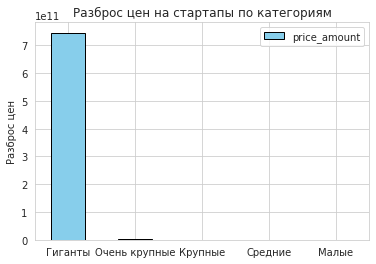

<Figure size 1152x1152 with 0 Axes>

In [92]:
# Посмотрим для наглядности разброс цен на столбчатой диаграмме
category_amount_std.plot.bar(legend=True,
                title='Разброс цен на стартапы по категориям',  
                ylabel='Разброс цен',  
                xlabel='',
                color='skyblue',
                edgecolor='black',                                                                   
                rot=0)
sns.set_style("whitegrid")
plt.figure(figsize=(16, 16))
plt.show()

Наибольший разброс цен в категории  Гиганты.

Наибольший интерес по цене представляют крупные компании, но при этом они же связаны с большими рисками, так как имеют больший разброс цен.


### Анализ количества раундов финансирования перед покупкой

In [93]:
# Посмотрим на значения в стобце funding_rounds
company_filtered['funding_rounds'].describe()

count    27874.000000
mean         1.736852
std          1.254916
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Так как максимальное значение сильно выделяется и медиана значительно меньше среднего, значения в данных неравномерны. Поэтому за типичное среднее количество раундов лучше взять значение медианы.

In [94]:
# Посчитаем типичное значение числа раундов финансирования по статусам
company_filtered.groupby('status')['funding_rounds'].median()

status
acquired     2.0
closed       1.0
ipo          2.0
operating    1.0
Name: funding_rounds, dtype: float64

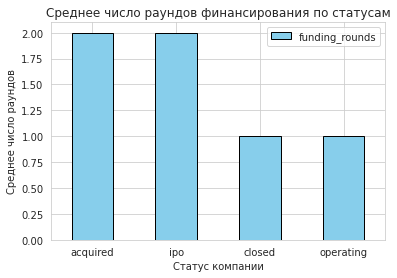

<Figure size 1152x1152 with 0 Axes>

In [95]:
# Выведем типичное значение числа раундов финансирования по статусам на диаграмме
company_filtered.groupby('status')['funding_rounds'].median().sort_values(ascending=False).plot.bar(legend=True,
                title='Среднее число раундов финансирования по статусам',  
                ylabel='Среднее число раундов',  
                xlabel='Статус компании',
                color='skyblue',
                edgecolor='black',                                                                   
                rot=0)
sns.set_style("whitegrid")
plt.figure(figsize=(16, 16))
plt.show()

Наибольшее среднее количество раундов в категории купленных компаний acquired и со статусом ipo - вышедших на фондовый рынок.

До стадии IPO доходят только самые успешные стартапы и соответственно число раундов финансирования, как правило, больше чем у остальных стадий развития стартапов.


## Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

**В ходе проекта были проведены**

- Сбор и подготовка данных: Данные были очищены от пропущенных значений и дубликатов и приведены к удобному для анализа формату, проведены разделение либо объединение таблиц, необходимых для анализа.

- Анализ данных: Были исследованы основные статистические характеристики, проведена визуализация распределений и выявлены возможные закономерности.

- Оценка результатов: Проведен анализ метрик и проверка гипотез.

### Выводы:

Полученные результаты подтвердили гипотезу о том полнота сведений о сотрудниках (например, об их образовании) зависит от размера компаний. Чем меньше компания, тем меньше информации о сотрудниках.

В ходе анализа определен типичный общий размер финансирования одной компании в 2,56 млн

Выявлены компании которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

Компании стартапов разбиты на категории:
- Малые < 1 млн,
- Средние 1 млн - 10 млн,
- Крупные 10 млн - 100 млн,
- Очень крупные 100M - 1 млрд,
- Гиганты > 1 млрд"

Проведен анализ типичных цен на стартапы и наибольший разброс цен за стартап.  Наибольший интерес по цене представляют крупные компании - категория Гиганты, но при этом они же связаны с большими рисками, так как имеют больший разброс цен.

Проанализированы данные о количестве раундов финансирования стартапов по группам:

- acquired 
- closed
- ipo
- operating

В среднем в каждой группе проходит от 1 до 2 раундов. Наибольшее среднее количество раундов финансирования проходят купленные компание и компании со статусом ipo - вышедшие на фондовый рынок.

### Рекомендации

**Повысить прозрачность данных**
- Требовать от стартапов минимальный набор сведений (о команде, образовании, стадиях).
- Отдавать приоритет компаниям с полной и достоверной отчетностью.

**Усилить контроль крупных инвестиций**
- Проводить углублённую комплексную оценку компаний, выбраных для крупных инвестиций.
- Финансировать поэтапно, при достижении установленного KPI.

**Проанализировать неудачные сделки**
- Выявить признаки стартапов, проданных за 0–1 доллар.
- Создать/обновить скоринговую модель отбора.

**Учитывать профиль команды**
- Включить уровень образования и опыта основателей в критерии оценки.
- Повышать вес прозрачности данных о команде.

**Разделить стартапы по категориям риска**

- До 3 млн руб — поддержка и менторство.
- 3–9 млн руб — основной фокус инвестиций.
- 9 млн руб — высокий риск, строгие контрольные точки.

**Учесть динамику по годам**
- Анализировать причины снижения активности после 2005 года.
- Сместить фокус на перспективные ниши с ростом.

**Инвестировать в аналитику и автоматизацию**
- Создать единую систему мониторинга стартапов.
- Применять модели для прогнозирования успешности.
